In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as dr
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [2]:
spy= dr.DataReader('SPY',data_source='yahoo',start='2007-1-1')

<AxesSubplot:xlabel='Date'>

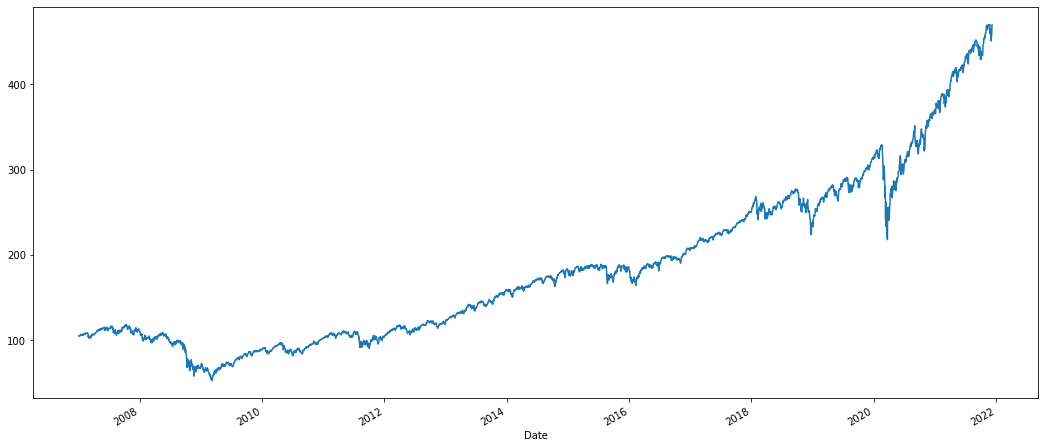

In [3]:
spy.get('Adj Close').plot(kind='line',figsize=(18,8))

In [4]:
spy_normalized= np.array(spy.get('Adj Close'))
spy_normalized=spy_normalized.reshape(-1,1)

In [5]:
scaler= MinMaxScaler()

In [6]:
scaler.fit(spy_normalized)

MinMaxScaler()

In [7]:
clean_data=scaler.fit_transform(spy_normalized)
clean_data

array([[0.1258834 ],
       [0.1264203 ],
       [0.12439791],
       ...,
       [0.9737489 ],
       [0.99652062],
       [0.99949604]])

In [8]:
spy= spy.assign(clean=clean_data)

In [9]:
spy= spy.fillna(spy.mean())

In [10]:
train_data= spy[:2500]

In [11]:
test_data= spy[2500:]

<AxesSubplot:xlabel='Date'>

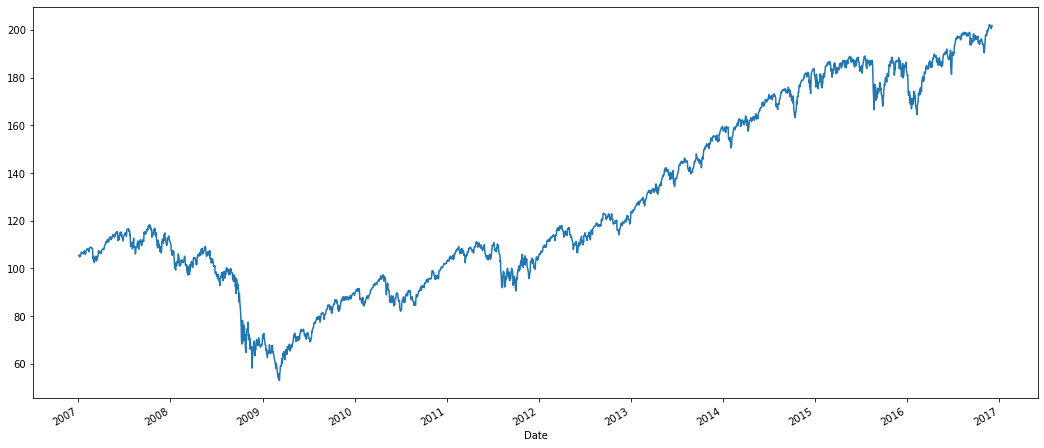

In [12]:
train_data.get('Adj Close').plot(kind='line',figsize=(18,8))

<AxesSubplot:xlabel='Date'>

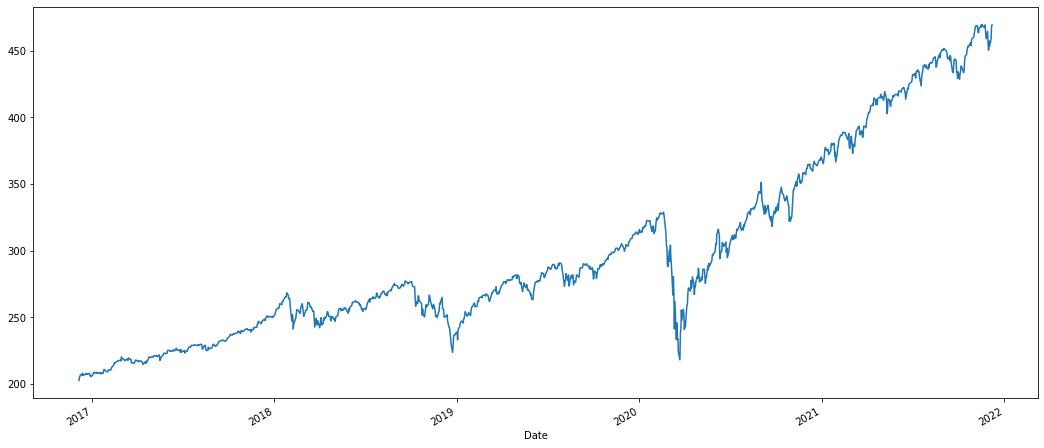

In [13]:
test_data.get('Adj Close').plot(kind='line',figsize=(18,8))

In [14]:
train_data2=np.array(train_data.get('clean'))

In [15]:
train_data2

array([0.1258834 , 0.1264203 , 0.12439791, ..., 0.35392657, 0.35416753,
       0.35705969])

In [16]:
train_data2 =np.array(train_data.get('clean'))

In [17]:
test_data2= np.array(test_data.get('clean'))

In [18]:
time_step=100

In [19]:
train_data2 =train_data2.reshape(train_data2.shape[0],1)

In [20]:
test_data2 =test_data2.reshape(len(test_data2),1)

<AxesSubplot:xlabel='Date'>

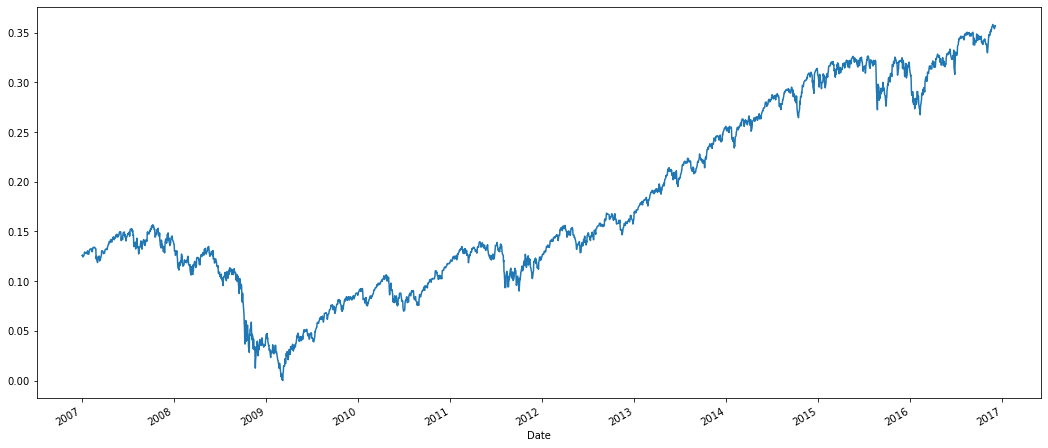

In [21]:
train_data.get('clean').plot(kind='line',figsize=(18,8))

<AxesSubplot:xlabel='Date'>

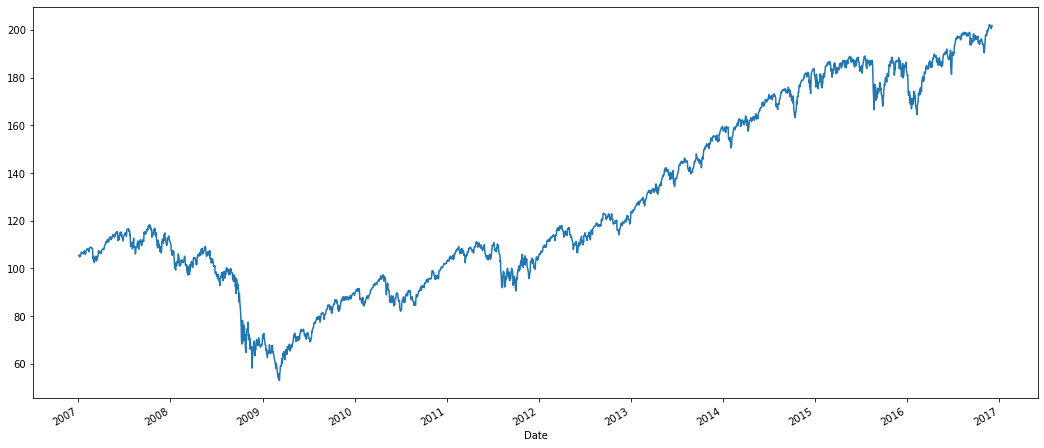

In [22]:
train_data.get('Adj Close').plot(kind='line',figsize=(18,8))

In [23]:
X_train = []
y_train = []
for i in range(60, 2500):
    X_train.append(spy.iloc[i-60:i, 6])
    y_train.append(spy.iloc[i, 6])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [24]:
# model=Sequential()
# model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
# model.add(LSTM(50,return_sequences=True))
# model.add(LSTM(50))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error',optimizer='adam')

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
77/77 [==============================] - 18s 125ms/step - loss: 0.0034
Epoch 2/100
77/77 [==============================] - 10s 133ms/step - loss: 4.5428e-04
Epoch 3/100
77/77 [==============================] - 10s 126ms/step - loss: 4.3551e-04
Epoch 4/100
77/77 [==============================] - 10s 124ms/step - loss: 3.6044e-04
Epoch 5/100
77/77 [==============================] - 10s 124ms/step - loss: 3.7877e-04
Epoch 6/100
77/77 [==============================] - 10s 123ms/step - loss: 3.4601e-04
Epoch 7/100
77/77 [==============================] - 10s 124ms/step - loss: 3.8168e-04
Epoch 8/100
77/77 [==============================] - 10s 124ms/step - loss: 3.6452e-04
Epoch 9/100
77/77 [==============================] - 10s 124ms/step - loss: 2.9415e-04
Epoch 10/100
77/77 [==============================] - 10s 124ms/step - loss: 2.8121e-04
Epoch 11/100
77/77 [==============================] - 10s 124ms/step - loss: 2.7794e-04
Epoch 12/100
77/77 [=========================

77/77 [==============================] - 9s 115ms/step - loss: 1.0642e-04
Epoch 96/100
77/77 [==============================] - 8s 109ms/step - loss: 1.2255e-04
Epoch 97/100
77/77 [==============================] - 9s 113ms/step - loss: 9.9864e-05
Epoch 98/100
77/77 [==============================] - 9s 114ms/step - loss: 1.1292e-04
Epoch 99/100
77/77 [==============================] - 9s 113ms/step - loss: 9.7476e-05
Epoch 100/100
77/77 [==============================] - 9s 111ms/step - loss: 1.0276e-04


In [25]:
X_train

array([[[0.1258834 ],
        [0.1264203 ],
        [0.12439791],
        ...,
        [0.12956434],
        [0.12769555],
        [0.12796509]],

       [[0.1264203 ],
        [0.12439791],
        [0.12556107],
        ...,
        [0.12769555],
        [0.12796509],
        [0.128019  ]],

       [[0.12439791],
        [0.12556107],
        [0.12534642],
        ...,
        [0.12796509],
        [0.128019  ],
        [0.12830652]],

       ...,

       [[0.35028799],
        [0.34919806],
        [0.33779689],
        ...,
        [0.35592033],
        [0.35686248],
        [0.35570126]],

       [[0.34919806],
        [0.33779689],
        [0.34446757],
        ...,
        [0.35686248],
        [0.35570126],
        [0.35392657]],

       [[0.33779689],
        [0.34446757],
        [0.33768796],
        ...,
        [0.35570126],
        [0.35392657],
        [0.35416753]]])

In [26]:
train_predict=model.predict(test_data2)
train_predict=scaler.inverse_transform(train_data2)

In [27]:
train_data2

array([[0.1258834 ],
       [0.1264203 ],
       [0.12439791],
       ...,
       [0.35392657],
       [0.35416753],
       [0.35705969]])

In [28]:
train_predict

array([[105.44675446],
       [105.67050171],
       [104.8276825 ],
       ...,
       [200.48248291],
       [200.582901  ],
       [201.78819275]])

In [29]:
test_data2

array([[0.35859331],
       [0.36494717],
       [0.36615211],
       ...,
       [0.9737489 ],
       [0.99652062],
       [0.99949604]])

In [30]:
spy

,High,Low,Open,Close,Volume,Adj Close,clean
Date,,,,,,,
2007-01-03,142.860001,140.570007,142.250000,141.369995,94807600.0,105.446754,0.125883
2007-01-04,142.050003,140.610001,141.229996,141.669998,69620600.0,105.670502,0.126420
2007-01-05,141.399994,140.380005,141.330002,140.539993,76645300.0,104.827682,0.124398
2007-01-08,141.410004,140.250000,140.820007,141.190002,71655000.0,105.312424,0.125561
2007-01-09,141.600006,140.399994,141.309998,141.070007,75680100.0,105.222969,0.125346
...,...,...,...,...,...,...,...
2021-12-02,459.070007,450.309998,450.730011,457.399994,127637800.0,457.399994,0.970413
2021-12-03,460.299988,448.920013,459.170013,453.420013,137167700.0,453.420013,0.960863
2021-12-06,460.790009,453.559998,456.130005,458.790009,98977500.0,458.790009,0.973749


In [31]:
test_predict=model.predict(test_data2)
test_predict=scaler.inverse_transform(test_data2)

In [32]:
test_predict

array([[202.42732239],
       [205.07525635],
       [205.57740784],
       ...,
       [458.79000854],
       [468.27999878],
       [469.51998901]])

In [33]:
predicted_results=np.append( train_predict,test_predict)

In [34]:
predicted_results

array([105.44675446, 105.67050171, 104.8276825 , ..., 458.79000854,
       468.27999878, 469.51998901])

In [35]:
len(predicted_results)

3761

In [36]:
spy= spy.assign(predicted=predicted_results)

In [37]:
spy

,High,Low,Open,Close,Volume,Adj Close,clean,predicted
Date,,,,,,,,
2007-01-03,142.860001,140.570007,142.250000,141.369995,94807600.0,105.446754,0.125883,105.446754
2007-01-04,142.050003,140.610001,141.229996,141.669998,69620600.0,105.670502,0.126420,105.670502
2007-01-05,141.399994,140.380005,141.330002,140.539993,76645300.0,104.827682,0.124398,104.827682
2007-01-08,141.410004,140.250000,140.820007,141.190002,71655000.0,105.312424,0.125561,105.312424
2007-01-09,141.600006,140.399994,141.309998,141.070007,75680100.0,105.222969,0.125346,105.222969
...,...,...,...,...,...,...,...,...
2021-12-02,459.070007,450.309998,450.730011,457.399994,127637800.0,457.399994,0.970413,457.399994
2021-12-03,460.299988,448.920013,459.170013,453.420013,137167700.0,453.420013,0.960863,453.420013
2021-12-06,460.790009,453.559998,456.130005,458.790009,98977500.0,458.790009,0.973749,458.790009


<AxesSubplot:xlabel='Date'>

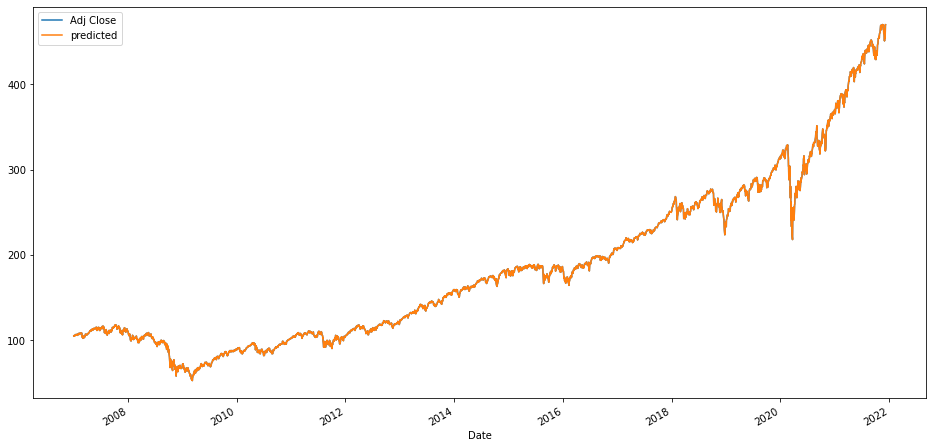

In [38]:
spy.get(['Adj Close','predicted']).plot(kind='line',figsize=(16,8))

In [66]:
# Getting the predicted stock price of 2017
dataset_train = spy.iloc[:2500, 1:2]
dataset_test = spy.iloc[2500:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(60, dataset_test.shape[0]+60):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(1261, 60, 1)


In [67]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

In [68]:
spy.iloc[60]

High         1.428400e+02
Low          1.405600e+02
Open         1.422400e+02
Close        1.420000e+02
Volume       1.281941e+08
Adj Close    1.063368e+02
clean        1.280190e-01
predicted    1.063368e+02
Name: 2007-03-30 00:00:00, dtype: float64

In [69]:
len(predicted_stock_price)

1261

In [70]:
test_df= spy.iloc[2500:]

In [71]:
test_df= test_df.assign(pred=predicted_stock_price)

In [72]:
test_df= test_df.drop(columns=['predicted'])

In [73]:
test_df

,High,Low,Open,Close,Volume,Adj Close,clean,pred
Date,,,,,,,,
2016-12-06,221.740005,220.660004,221.220001,221.699997,59877400.0,202.427322,0.358593,212.590225
2016-12-07,224.669998,221.380005,221.520004,224.600006,110738100.0,205.075256,0.364947,212.721573
2016-12-08,225.699997,224.259995,224.570007,225.149994,99714400.0,205.577408,0.366152,213.037796
2016-12-09,226.529999,225.369995,225.410004,226.509995,88005800.0,206.819153,0.369132,213.699997
2016-12-12,226.960007,225.759995,226.399994,226.250000,102016100.0,206.581787,0.368562,214.653305
...,...,...,...,...,...,...,...,...
2021-12-02,459.070007,450.309998,450.730011,457.399994,127637800.0,457.399994,0.970413,338.676880
2021-12-03,460.299988,448.920013,459.170013,453.420013,137167700.0,453.420013,0.960863,337.879730
2021-12-06,460.790009,453.559998,456.130005,458.790009,98977500.0,458.790009,0.973749,337.213684


<AxesSubplot:xlabel='Date'>

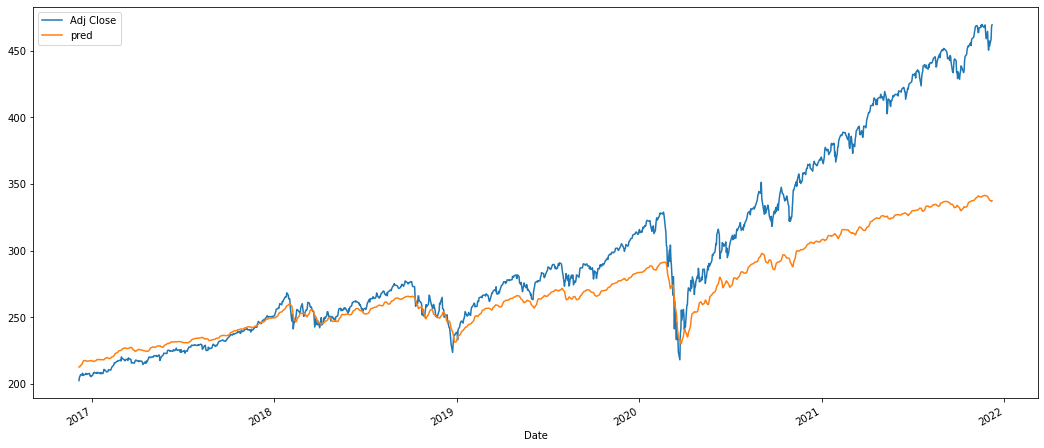

In [74]:
test_df.get(['Adj Close','pred']).plot(kind='line',figsize=(18,8))

In [75]:
test_df.get(['Adj Close','pred']).iloc[-1]

Adj Close    469.519989
pred         337.370422
Name: 2021-12-08 00:00:00, dtype: float64